In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#test = np.loadtxt('map.txt', delimiter=',')

In [4]:
test=np.zeros(10000).reshape(100,100)

In [13]:
#creat random map
test=np.zeros(10000).reshape(100,100)

for i in range(1,len(test)):
    
    if np.random.randint(2)==1:
        random_stack=np.random.randint(3)
        if random_stack==1:
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            continue

test=np.swapaxes(test,0,1)
for i in range(1,len(test)):
    
    if np.random.randint(2)==1:
        random_stack=np.random.randint(3)
        if random_stack==1:
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            random_stac=np.random.randint(1,90)
            test[i][random_stac:random_stac+np.random.randint(5,12)]=1
            continue
for i in range(45,55):
    for j in range(1,4):
        test[i][15*j]=1
        test[i+30][15*j]=1
        test[i-30][15*j]=1


In [14]:
#creat cords for ploting
x_list=[]
y_list=[]
for i in range(len(test)):
    for j in range(len(test[i])):
        if test[i][j]==1:
            y_list.append(i)
            x_list.append(j)

In [15]:

def state_finder(current_state,weight_gallery):
    weight_gallery=weight_parser(weight_gallery,current_state)
    x_state=[]
    y_state=[]
    if current_state[0]==0:
        x_state.append(0)
        x_state.append(1)
    elif current_state[0]==99:
        x_state.append(98)
        x_state.append(99)
    elif current_state[0]>99:
        x_state.append(98)
        x_state.append(99)
    else:
        
        x_state.append(current_state[0]-1)
        x_state.append(current_state[0])
        x_state.append(current_state[0]+1)
        
    if current_state[1]==0:
        y_state.append(0)
        y_state.append(1)
    elif current_state[1]==99:
        y_state.append(98)
        y_state.append(99)
    elif current_state[1]>99:
        y_state.append(98)
        y_state.append(99)
    else:
        y_state.append(current_state[1]-1)
        y_state.append(current_state[1])
        y_state.append(current_state[1]+1)
    cordinate_list=[]
    for x in x_state:
        for y in y_state:
            cordinate_list.append((x,y))
    cordinate_list.remove(current_state)   
    remove_list=[]
    for eachcord in cordinate_list:
        result = tuple(map(lambda i, j: abs(i - j), eachcord, current_state))
        if result[0]+result[1]>1:
            remove_list.append(eachcord)
    if len(remove_list)>0:
        for removethis in remove_list:
            cordinate_list.remove(removethis)

    corditation_object_list=[]
    for eachcord in cordinate_list:
        cordsanddirection={'side':'',
                       'cords':''}
        if eachcord[0]==current_state[0]:
            #vertical movement
            if eachcord[1]<current_state[1]:
                #north
                cordsanddirection['side']='north'
                cordsanddirection['cords']=eachcord
            else:
                #south
                cordsanddirection['side']='south'
                cordsanddirection['cords']=eachcord
        else:
            #horizontal movement
            if eachcord[0]>current_state[0]:
                #east
                cordsanddirection['side']='east'
                cordsanddirection['cords']=eachcord
            else:
                #west
                cordsanddirection['side']='west'
                cordsanddirection['cords']=eachcord
        cordsanddirection['status']='fresh'
        corditation_object_list.append(cordsanddirection)
    return corditation_object_list,weight_gallery

In [16]:
def distance_meter(eachcord):
    side=eachcord['side']
    cords=eachcord['cords']
    x_togo=cords[0]
    y_togo=cords[1]
    x_current=current_state[0]
    y_current=current_state[1]
    
    if side=='south':
        stack_test=np.swapaxes(test,1,0)
        straigh_line_in_y_axis=stack_test[x_current]
        if len(np.where(straigh_line_in_y_axis[y_current:]==1)[0])==0:
            #no obsticles
            if len(test[x_current])-y_current>10:
                #no obsticle at all
                closest_obsticle=12
            else:
                #end of root
                closest_obsticle=len(test[x_current])-y_current

        elif len(np.where(straigh_line_in_y_axis[y_current:]==1)[0])>0:
            closest_obsticle=int(np.where(straigh_line_in_y_axis[y_current:]==1)[0][0])

        distance_to_obsticle=closest_obsticle

        if distance_to_obsticle>=10:
            #free to go
            eachcord['distance']=10
        else:
            #obsticle ahead
            eachcord['distance']=distance_to_obsticle
            
    if side=='east':
        straight_line_in_x_axis=test[y_current]
        if len(np.where(straight_line_in_x_axis[x_current:]==1)[0])==0:
            #no obsticles
            if len(test[y_current])-x_current>10:
                #no obsticle at all
                distance_to_obsticle=12
            else:
                #end of root
                distance_to_obsticle=len(test[y_current])-x_current
        elif len(np.where(straight_line_in_x_axis[x_current:]==1)[0])>0:
            #obsticle found
            distance_to_obsticle=int(np.where(straight_line_in_x_axis[x_current:]==1)[0][0])

        if distance_to_obsticle>=10:
            #free to go
            eachcord['distance']=10

        else:
            #obsticle ahead
            eachcord['distance']=distance_to_obsticle
            
    if side=='west':
        backward_line_in_x_axis=np.flipud(test[y_current])
        if len(np.where(backward_line_in_x_axis[-x_current-1:]==1)[0])==0:
            #no obsticles
            if (len(test[y_current])-(len(test[y_current])-x_current))+1>(10):
                #no obsticle at all
                closest_obsticle=12 
            else:
                closest_obsticle=(len(test[y_current])-(len(test[y_current])-x_current))+1

        elif len(np.where(backward_line_in_x_axis[-x_current-1:]==1)[0])>0:
            closest_obsticle=int(np.where(backward_line_in_x_axis[-x_current-1:]==1)[0][0])

        distance_to_obsticle=closest_obsticle
        if distance_to_obsticle>=10:
            #free to go
            eachcord['distance']=10

        else:
            #obsticle ahead
            eachcord['distance']=distance_to_obsticle

    if side=='north':
        stack_test=np.swapaxes(test,1,0)
        backward_line_in_y_axis=np.flipud(stack_test[x_current])
        if len(np.where(backward_line_in_y_axis[-y_current-1:]==1)[0])==0:
            #no obsticles
            if (len(test[y_current])-(len(test[y_current])-y_current))+1>(10):
                #no obsticle at all
                closest_obsticle=12
            else:
                #end of root
                closest_obsticle=(len(test[y_current])-(len(test[y_current])-y_current))+1

        elif len(np.where(backward_line_in_y_axis[-y_current-1:]==1)[0])>0:
            closest_obsticle=int(np.where(backward_line_in_y_axis[-y_current-1:]==1)[0][0])

        distance_to_obsticle=closest_obsticle

        if distance_to_obsticle>=10:
            #free to go
            eachcord['distance']=10

        else:
            #obsticle ahead
            eachcord['distance']=distance_to_obsticle
    return eachcord

In [17]:
def fear_factor(vmax=5,dmax=10,eachcord={}):
    df=eachcord['distance']
    if df==1:
        return eachcord,False 
    if df>1:
        #ترس
        fear=dmax/df
        #شادی
        happy_ness=(df**.25)*10
        #امنیت
        safety=(happy_ness-fear)+1/df
    else:
        happy_ness=1
        fear=10
        safety=0
    vfear=(vmax/((fear+1)/10))
    eachcord['fear']=fear
    
    vhappy=vmax/((happy_ness+1)/10)
    eachcord['happiness']=happy_ness
    
    vsafety=vmax/((safety+1)/10)
    eachcord['safety']=safety
    
    eachcord['spead_f']=(vfear+vhappy+vsafety)/3
    return eachcord,True

In [18]:
def dizzy(cord_object,weight_gallery):
    cord_object['dizzy_ness']=weight_gallery[cord_object['cords']]
    return cord_object

In [24]:
def besdirection(cordsanddirection,weight_gallery):
    lowest_fear=10
    check_list=[]
    best_direction={}
    weight_stack_list=[]
    for i in cordsanddirection:
        if i['side']=='east':
            if i['distance']>2:
                return i
    #+++++++++++++++
    for i in cordsanddirection:
        if i['cords'] not in weight_gallery.keys():
            if i['fear']<lowest_fear:
                lowest_fear=i['fear']
                best_direction =i
        else:
            check_list.append(i)
    if len(best_direction)==0:
        
        for i in cordsanddirection:
            if i['cords'] in weight_gallery.keys():
                weight_stack_list.append(weight_gallery[i['cords']])
            else:
                
                return i
                
        stack_min=min(weight_stack_list)

        needed_index=weight_stack_list.index(stack_min)
        best_direction=cordsanddirection[needed_index]
        best_direction=dizzy(cord_object=best_direction,weight_gallery=weight_gallery)
    return best_direction

In [25]:
def weight_parser(weight_gallery,current_state):
    if current_state not in weight_gallery.keys():
        weight_gallery[current_state]=1
    else:
        weight_gallery[current_state]+=1
    return weight_gallery

In [26]:
current_state=(0,50)
weight_gallery={}
state_recorder={}
way_x_list=[]
way_y_list=[]
cordsanddirection,weight_gallery=state_finder(current_state,weight_gallery)
pop_list=[]
for i in range(len(cordsanddirection)):
    cordsanddirection[i]=distance_meter(eachcord=cordsanddirection[i])
    cordsanddirection[i],root_check=fear_factor(eachcord=cordsanddirection[i])
    if root_check==False:
        pop_list.append(cordsanddirection[i])
for j in pop_list:
    cordsanddirection.remove(j)
if len(cordsanddirection)==0:
    print('map has no escape point')
best_direction=besdirection(cordsanddirection,weight_gallery)

way_x_list=[current_state[0]]
way_y_list=[current_state[1]]

while current_state[0]!=99:
    state=len(state_recorder)
    state_recorder[state]={'current':'','decision':'','progress':''}
    state_recorder[state]['current']=current_state
    state_recorder[state]['decision']=best_direction
    state_recorder[state]['progress']=best_direction['status']


    
    cordsanddirection,weight_gallery=state_finder(current_state,weight_gallery)
    
    
    pop_list=[]
    for i in range(len(cordsanddirection)):
        cordsanddirection[i]=distance_meter(eachcord=cordsanddirection[i])
        cordsanddirection[i],root_check=fear_factor(eachcord=cordsanddirection[i])
        if root_check==False:
            pop_list.append(cordsanddirection[i])
    try:
        
        for j in pop_list:
            
            cordsanddirection.remove(j)
    except:
        print(j)

        cordsanddirection.remove(j)
    if len(cordsanddirection)==0:
        print('map has no escape point')
        
        
    best_direction=besdirection(cordsanddirection,weight_gallery)
    current_state=best_direction['cords']
    way_x_list.append(current_state[0])
    way_y_list.append(current_state[1])
print(current_state[0])

99


In [ ]:
state_recorder

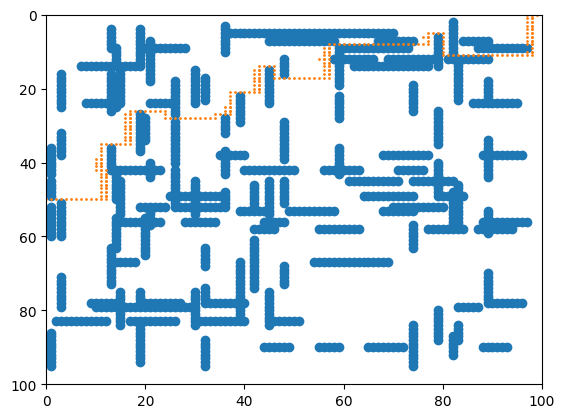

In [27]:
fig, ax = plt.subplots()
plt.xlim(0,100)
plt.ylim(100,0)
#start_point_y=np.random.randint(48,52)
#finish_point_y=np.random.randint(30,70)
ax.scatter(x_list,y_list)
ax.scatter(way_x_list,way_y_list,s=1)
#ax.scatter(0,start_point_y,c='#000000')
#ax.text(0,start_point_y,'start')
#ax.scatter(100,finish_point_y,c='#000000')

#ax.text(x=90,y=finish_point_y,s='finish')

plt.show()